## Paper used: Olalekan, S., Xie, B., Back, R., Eckart, H., & Basu, A. (2021). Characterizing the tumor microenvironment of metastatic ovarian cancer by single-cell transcriptomics. Cell reports, 35(8).

### Improvements to make:
### <font color = red> Comment on the differences between your data and theirs. Why are your data different. How well do your clusters correspond to different cell types? I know the authors did not provide their annotations, which they should have, however, the text of the paper and supplementary tables do provide a number of markers which could have been used to check whether your clusters have particular identities. Comment on the pathways and if they are the same or different.
</font>

## Introduction: 

### Among malignancies of the female reproductive tract, ovarian cancer is the most lethal (Siegal et al., 2017). Coupled with the fact that most ovarian cancers are diagnosed at stages III and IV, the demand for effective therapies on metastatic forms of ovarian cancer is apparent (Testa et al., 2018). Bulk RNA sequencing has been used to characterize histotypes of ovarian carcinomas, but is unable to capture cell type contributions to the disease. The research paper which I have chosen for my final project, Characterizing the tumor microenvironment of metastatic ovarian cancer by single-cell transcriptomics by Olalekan et al., describes a single-cell RNA sequencing study performed on 9885 cells in 6 ovarian cancer patients in order to address aspects of gene expression and contributing factors to lethal types of cancer that are often overlooked by bulk RNA sequencing. Tumor composition studies performed through single-cell sequencing are crucial for developing therapies for late-diagnosed ovarian cancer that capture the contribution of immune cell types and subsets that influence the tumor microenvironment. 
### Utilizing single-cell RNA sequencing tools to investigate disease pathways and regulatory networks linked to cancer-correlated cell subtypes, the authors of this paper find a divide in the T cell infiltration level between patient groups. This divide is characterized by the presence of unique cell cluster types and subtypes which suggest a link between the high T infiltration group and anti-tumor responses. CD8 and TOX genes were also found to correlate with a more reactive T cell population.

## Methods:

### All required packages are in the Importing and Preprocessing section of the report. The GEO Accession number is GSE147082: The 6 patient data .csv files can be downloaded from https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE147082
### Images from the paper and the paper itself are provided in the Canvas submission.
### The order which each claim in the results is provided is logical, not chronological, following the flow of the code required to produce each figure instead of the order which these claims are presented in the paper, although the non-chronological claims are from the same figure.

### Figure 2E includes both the epithelial cell subclusters and the heatmap, so they are referred to here as Figure 2E1 and Figure 2E2. 
### The authors used hierarchical clustering on data integrated with previously published ovarian cancer scRNA-seq data confirmed by Drop-seq data to produce Figure 2E1, but in lieu of this extra data I used a different method of clustering to achieve more accurate results.
### The information shown in Table S2 links pathways to specific subclusters, but without annotations for these subclusters, I was only able to perform ontology analysis on the epithelial cell cluster as a whole.

## Importing and Preprocessing

In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import anndata as ad
from PIL import Image
from IPython.display import display
import gget
from sklearn import decomposition, preprocessing
import scipy
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [2]:
#import 6 patient data files
file_1 = pd.read_csv('GSM4416534_PT-3232.csv', index_col = 0)
file_2 = pd.read_csv('GSM4416535_PT-5150.csv', index_col = 0)
file_3 = pd.read_csv('GSM4416536_PT-6885.csv', index_col = 0)
file_4 = pd.read_csv('GSM4416537_PT-4806.csv', index_col = 0)
file_5 = pd.read_csv('GSM4416538_PT-3401.csv', index_col = 0)
file_6 = pd.read_csv('GSM4416539_PT-2834.csv', index_col = 0)


In [3]:
#add number label to columns in each file pre-concatenation
file_1 = file_1.add_suffix('_1')
file_2 = file_2.add_suffix('_2')
file_3 = file_3.add_suffix('_3')
file_4 = file_4.add_suffix('_4')
file_5 = file_5.add_suffix('_5')
file_6 = file_6.add_suffix('_6')

#make list of all files for concatenation
csv_files = [file_1, file_2, file_3, file_4, file_5, file_6]

In [4]:
#concatenate
concat_files = file_1.join(csv_files[1:])
concat_files

ACCCTCTCGCTA_1  ATTAGGAGACTG_1  CCACAGTCGCCA_1  CCATGTTGCTGG_1  \
TSPAN6                 0.0             0.0             0.0             1.0   
DPM1                   9.0             2.0             5.0             3.0   
SCYL3                  0.0             0.0             0.0             0.0   
C1orf112               0.0             0.0             0.0             0.0   
FGR                    0.0             0.0             0.0             0.0   
...                    ...             ...             ...             ...   
AP003175.1             0.0             0.0             3.0             0.0   
AC099063.4             0.0             0.0             0.0             0.0   
AL139424.3             0.0             0.0             0.0             0.0   
AL358472.5             0.0             0.0             0.0             0.0   
AL034417.4             0.0             0.0             0.0             0.0   

            CCCGATCCAAGA_1  CCCGGAGGGCCA_1  CCTCTTCTCGCC_1  CGGGCCTAGACC_1  \
TSPAN6                 0.0             1.0             3.0             2.0   
DPM1                   8.0             3.0             1.0             0.0   
SCYL3                  0.0             0.0             1.0             0.0   
C1orf112               0.0             0.0             1.0             0.0   
FGR                    0.0             0.0             0.0             0.0   
...                    ...             ...             ...             ...   
AP003175.1             0.0             1.0             0.0             1.0   
AC099063.4             0.0             0.0             0.0             0.0   
AL139424.3             0.0             0.0             0.0             0.0   
AL358472.5             0.0             0.0             0.0             0.0   
AL034417.4             0.0             0.0             0.0             0.0   

            CGTCTCCCATGG_1  CGTTCAGACAAC_1  ...  TTTTGACCTTGA_6  \
TSPAN6                 0.0             0.0  ...             0.0   
DPM1                  10.0             2.0  ...             0.0   
SCYL3                  0.0             0.0  ...             0.0   
C1orf112               1.0             0.0  ...             0.0   
FGR                    0.0             0.0  ...             0.0   
...                    ...             ...  ...             ...   
AP003175.1             1.0             0.0  ...             NaN   
AC099063.4             0.0             0.0  ...             NaN   
AL139424.3             0.0             0.0  ...             0.0   
AL358472.5             0.0             0.0  ...             0.0   
AL034417.4             0.0             0.0  ...             0.0   

            TTTTGAGCGATG_6  TTTTGCGAGGTT_6  TTTTGGGTTAAT_6  TTTTTCCAGGAA_6  \
TSPAN6                 0.0             0.0             0.0             0.0   
DPM1                   0.0             0.0             0.0             0.0   
SCYL3                  0.0             0.0             0.0             0.0   
C1orf112               0.0             0.0             0.0             0.0   
FGR                    0.0             0.0             0.0             0.0   
...                    ...             ...             ...             ...   
AP003175.1             NaN             NaN             NaN             NaN   
AC099063.4             NaN             NaN             NaN             NaN   
AL139424.3             0.0             0.0             0.0             0.0   
AL358472.5             0.0             0.0             0.0             0.0   
AL034417.4             0.0             0.0             0.0             0.0   

            TTTTTCCGAGCG_6  TTTTTGGTAGCC_6  TTTTTGGTGACT_6  TTTTTTAGCACG_6  \
TSPAN6                 0.0             0.0             0.0             0.0   
DPM1                   0.0             0.0             0.0             0.0   
SCYL3                  0.0             0.0             0.0             0.0   
C1orf112               0.0             1.0             1.0             0.0   
FGR   

In [5]:
#drop all NA values for conversion to anndata - dataframe should go from 19297 x 9885 to 16041 x 9885
concat_n = concat_files.dropna()
concat_n

ACCCTCTCGCTA_1  ATTAGGAGACTG_1  CCACAGTCGCCA_1  CCATGTTGCTGG_1  \
TSPAN6                 0.0             0.0             0.0             1.0   
DPM1                   9.0             2.0             5.0             3.0   
SCYL3                  0.0             0.0             0.0             0.0   
C1orf112               0.0             0.0             0.0             0.0   
FGR                    0.0             0.0             0.0             0.0   
...                    ...             ...             ...             ...   
AC073111.5             0.0             0.0             0.0             0.0   
AC079781.5             1.0             1.0             0.0             0.0   
AL139424.3             0.0             0.0             0.0             0.0   
AL358472.5             0.0             0.0             0.0             0.0   
AL034417.4             0.0             0.0             0.0             0.0   

            CCCGATCCAAGA_1  CCCGGAGGGCCA_1  CCTCTTCTCGCC_1  CGGGCCTAGACC_1  \
TSPAN6                 0.0             1.0             3.0             2.0   
DPM1                   8.0             3.0             1.0             0.0   
SCYL3                  0.0             0.0             1.0             0.0   
C1orf112               0.0             0.0             1.0             0.0   
FGR                    0.0             0.0             0.0             0.0   
...                    ...             ...             ...             ...   
AC073111.5             0.0             0.0             0.0             0.0   
AC079781.5             3.0             0.0             0.0             0.0   
AL139424.3             0.0             0.0             0.0             0.0   
AL358472.5             0.0             0.0             0.0             0.0   
AL034417.4             0.0             0.0             0.0             0.0   

            CGTCTCCCATGG_1  CGTTCAGACAAC_1  ...  TTTTGACCTTGA_6  \
TSPAN6                 0.0             0.0  ...             0.0   
DPM1                  10.0             2.0  ...             0.0   
SCYL3                  0.0             0.0  ...             0.0   
C1orf112               1.0             0.0  ...             0.0   
FGR                    0.0             0.0  ...             0.0   
...                    ...             ...  ...             ...   
AC073111.5             2.0             0.0  ...             0.0   
AC079781.5             0.0             2.0  ...             0.0   
AL139424.3             0.0             0.0  ...             0.0   
AL358472.5             0.0             0.0  ...             0.0   
AL034417.4             0.0             0.0  ...             0.0   

            TTTTGAGCGATG_6  TTTTGCGAGGTT_6  TTTTGGGTTAAT_6  TTTTTCCAGGAA_6  \
TSPAN6                 0.0             0.0             0.0             0.0   
DPM1                   0.0             0.0             0.0             0.0   
SCYL3                  0.0             0.0             0.0             0.0   
C1orf112               0.0             0.0             0.0             0.0   
FGR                    0.0             0.0             0.0             0.0   
...                    ...             ...             ...             ...   
AC073111.5             0.0             0.0             0.0             1.0   
AC079781.5             0.0             0.0             1.0             0.0   
AL139424.3             0.0             0.0             0.0             0.0   
AL358472.5             0.0             0.0             0.0             0.0   
AL034417.4             0.0             0.0             0.0             0.0   

            TTTTTCCGAGCG_6  TTTTTGGTAGCC_6  TTTTTGGTGACT_6  TTTTTTAGCACG_6  \
TSPAN6                 0.0             0.0             0.0             0.0   
DPM1                   0.0             0.0             0.0             0.0   
SCYL3                  0.0             0.0             0.0             0.0   
C1orf112               0.0             1.0             1.0             0.0   
FGR   

In [6]:
#transform to anndata, transpose so that genes are in .var (for pca and later analysis)
concat = sc.AnnData(concat_n)
concat = concat.transpose()

In [7]:
#view concat anndata
concat.var

Empty DataFrame
Columns: []
Index: [TSPAN6, DPM1, SCYL3, C1orf112, FGR, CFH, FUCA2, GCLC, NFYA, STPG1, NIPAL3, LAS1L, ENPP4, SEMA3F, ANKIB1, CYP51A1, KRIT1, RAD52, BAD, LAP3, HS3ST1, AOC1, MAD1L1, LASP1, SNX11, TMEM176A, M6PR, KLHL13, ICA1, DBNDD1, ALS2, CASP10, CFLAR, TFPI, NDUFAF7, RBM5, MTMR7, SLC7A2, ARF5, SARM1, POLDIP2, PLXND1, AK2, CD38, FKBP4, KDM1A, RBM6, CAMKK1, RECQL, VPS50, HSPB6, ARHGAP33, NDUFAB1, PDK4, ZMYND10, ABCB5, SLC25A13, ST7, CDC27, HCCS, DVL2, PRSS22, UPF1, SKAP2, SLC25A5, MCUB, POLR2J, DHX33, MEOX1, THSD7A, LIG3, RPAP3, ACSM3, REXO5, CIAPIN1, SPPL2B, FAM214B, COPZ2, PRKAR2B, MSL3, CREBBP, TSPOAP1, GCFC2, WDR54, CROT, KMT2E, RHBDD2, IBTK, ZNF195, MYCBP2, FBXL3, ITGAL, PDK2, ITGA3, ZFX, LAMP2, ITGA2B, GDE1, C19orf60, CRLF1, ...]

[16041 rows x 0 columns]

In [8]:
concat.obs

Empty DataFrame
Columns: []
Index: [ACCCTCTCGCTA_1, ATTAGGAGACTG_1, CCACAGTCGCCA_1, CCATGTTGCTGG_1, CCCGATCCAAGA_1, CCCGGAGGGCCA_1, CCTCTTCTCGCC_1, CGGGCCTAGACC_1, CGTCTCCCATGG_1, CGTTCAGACAAC_1, GATCAAGGGACC_1, GCCTCTAATGTC_1, GGCTCTCCAAGT_1, GGTGGGTGCCTA_1, TCCTAGTTCCCT_1, TCGCCCCATGTT_1, TGAGAGTTAGTT_1, TGCTACCGTTGG_1, AAGATCAGCTGT_1, AAGCCTCTTAGT_1, ACCTAGGGCGAC_1, ACGAAGACCACC_1, ACTAATTCGCAG_1, ACTCTCGTGCCG_1, ACTTAGCCAGGG_1, AGAGAACTGGCA_1, AGAGGATAGGTG_1, AGATGCATCCAC_1, AGCTACCCACAA_1, AGTATTTTATGG_1, ATCCCCCACCGA_1, ATCGCATAAGCC_1, ATCGCGTGCGTC_1, ATGCACTGCCGG_1, ATGCAGGCCAAA_1, CAAAGGGCTACG_1, CAACCATTGTCA_1, CAACTAGCACTA_1, CACCGGTACCCC_1, CACTCATACTGA_1, CAGTCGGTCCGG_1, CCCCAATCCAAA_1, CCCCGCAGTCGC_1, CCCCTGACCCGC_1, CCCGGTTGGATG_1, CCCTCAACGCGT_1, CCGCAGCTACTT_1, CGAGCGTGATGC_1, CGATCAGGAACT_1, CGATCTATGTAT_1, CGCGGTGCGTGT_1, CGGGACCCAGCC_1, CGTAAAGGCCAC_1, CTAAGAGCTTTT_1, CTCCGAGTACGT_1, CTCGAGTGGCTA_1, CTCTCGCCTTTT_1, CTGGATCGCCAC_1, CTTATACTATCC_1, CTTCCTTGCGAG_1, CTTTGGGTCGTG_1, GACCAACTTCCA_1, GACCTCTCCTTT_1, GATCATAATAAT_1, GCTACCCGTCTA_1, GCTCTCTCTGCT_1, GCTGAATCGTGC_1, GCTTAGTACAGC_1, GCTTCAGGTAAG_1, GCTTTGCAAACA_1, GGACTCGAAAAT_1, GGCGGTCTCGCT_1, GGGACGACCACC_1, GGGTACGCTATC_1, GGTCCAAGCACT_1, GGTTCAACGTGA_1, GTAACCTCGCGC_1, GTACGATCTTAG_1, GTCTCGCGCGTA_1, GTGACAATCATG_1, GTGCCGCGGTTG_1, GTGCTCGCATCA_1, GTGGTCAAGGCT_1, TACAGCGAACGA_1, TCACAGAGTAAC_1, TCAGCACGTCCA_1, TCATCGCGTGCA_1, TCCGTAATGTGT_1, TCCGTCGACTAT_1, TCCTGGGGTATC_1, TCGAGTTGCAAG_1, TCGCTTGTGCGG_1, TCGTGACATGGA_1, TCGTGAGGAGAG_1, TCTCACTGCCCC_1, TCTCCGGGCGTT_1, TCTGGTCTAGAT_1, TGACACGCCCGA_1, TGACATCATTTT_1, TGCAGATGCCGG_1, ...]

[9885 rows x 0 columns]

In [9]:
concat.X

array([[0., 9., 0., ..., 0., 0., 0.],
       [0., 2., 0., ..., 0., 0., 0.],
       [0., 5., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

## Results: 
### Here, I aim to replicate five claims the authors made in their paper based on the accessible data from this study.

## Claim 1: UMAP clustering detected 9 clusters of broadly defined cell types (Fig 2A). 

In [10]:
#perform pca analysis
sc.tl.pca(concat)

#neighbors and umap
sc.pp.neighbors(concat)
sc.tl.umap(concat)

In [11]:
#perform leiden clustering - no annotation information/annotated cell column was provided by authors
np.random.seed(0)
sc.tl.leiden(concat,resolution=0.31) 

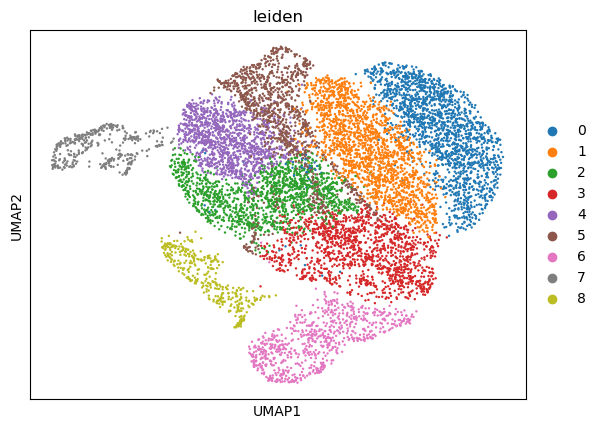

In [12]:
#Note: cluster annotation was only possible for one cluster for which marker genes are provided later in Fig 2F
sc.pl.umap(concat,color = "leiden")

### Fig 2A from paper for comparison:

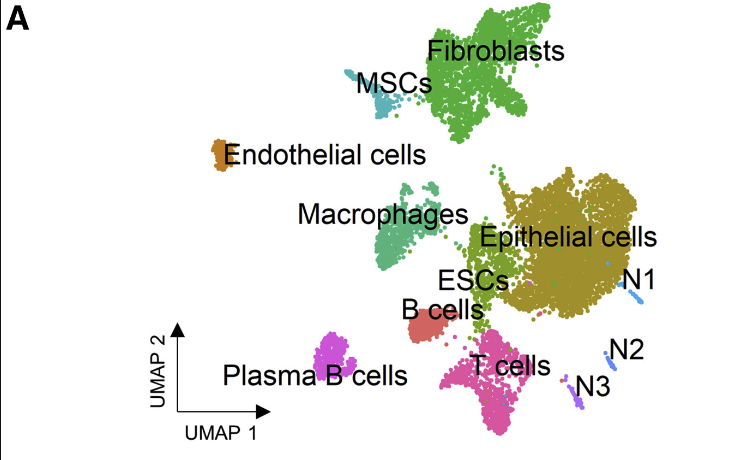

In [13]:
fig_2a_path = 'Figure 2A.png'
fig_2a = Image.open(fig_2a_path)
display(fig_2a)

## Claim 2: PAX8 and MUC16, indicative of advanced disease, as well as other relevant marker genes, are expressed by epithelial cells (Fig 2F). 

In [14]:
#Notes: 
#need to see which of the 9 clusters found is most likely to be epithelial cells based on expression of markers
#original authors used GENCODE and the Cancer Genome Atlas applied to Drop-Seq data, which are not accessible
#cluster number has already been added to anndata

#create list of marker genes for important clusters based on genes in Figure 2F for epithelial cells
markers = ['MUC16', 'PAX8', 'MKI67', 'VIM', 'ZEB1', 'FN1']

In [15]:
#convert categorical variables to int for ease of use in for loop
concat.obs["leiden"] = concat.obs["leiden"].astype(int)

In [16]:
#create list containing all leiden clusters
concat_clusters = [0, 1, 2, 3, 4, 5, 6, 7, 8]

for i in np.arange(0,9):
    concat_clusters[i] = concat[concat.obs["leiden"] == i].copy()


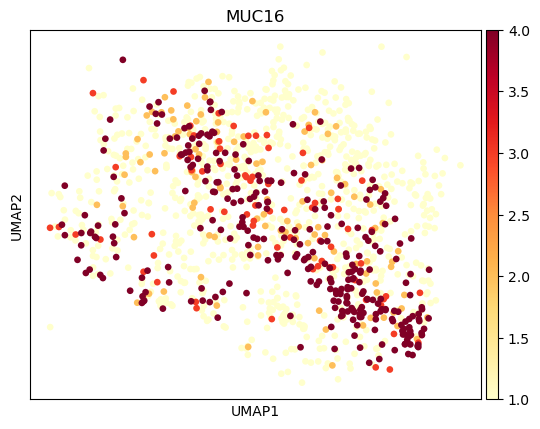

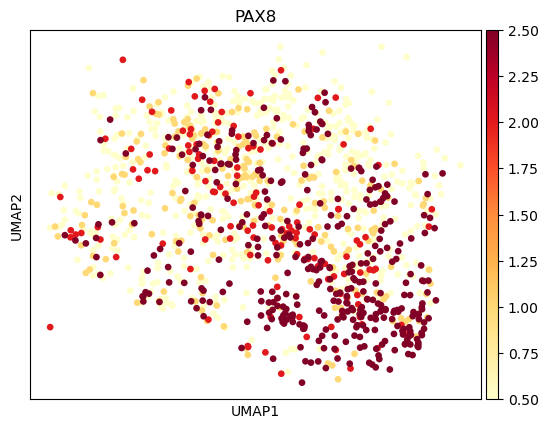

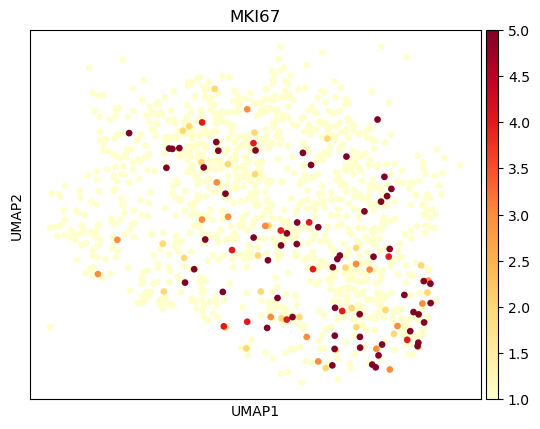

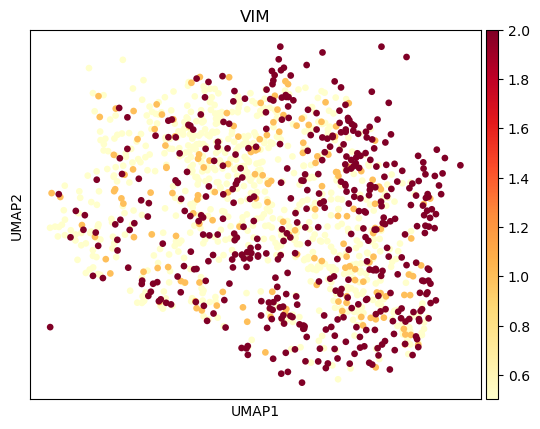

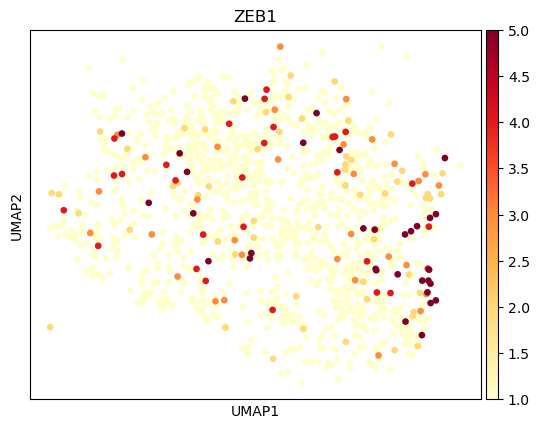

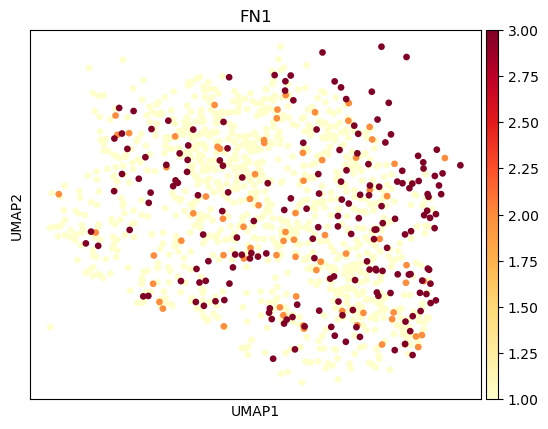

In [18]:
#cluster 3 corresponds to epithelial cells 
#based on comparable expression of these genes between my analysis and figure 2F

#extract cluster 3
clus3 = concat_clusters[3].copy()

#define vmin, vmax based on values shown in Fig 2F
vmin_values = [1, 0.5, 1, 0.5, 1, 1]  
vmax_values = [4, 2.5, 5, 2, 5, 3]   

for i in np.arange(0, 6):
    sc.pl.umap(clus3, color=markers[i], cmap='YlOrRd', vmin=vmin_values[i], vmax=vmax_values[i], title=markers[i])
    
plt.show()

### Fig 2F from paper for comparison:

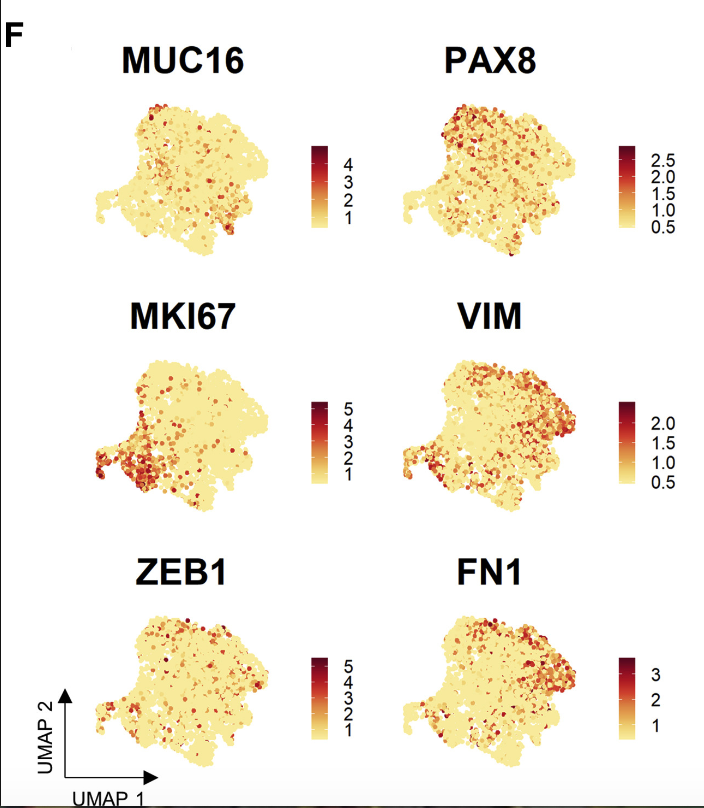

In [19]:
fig_2f_path = 'Figure 2F.png'
fig_2f = Image.open(fig_2f_path)
display(fig_2f)

## Claim 3: Epithelial cells (and ESCs) can be clustered via hierarchical clustering into 7 subclusters depicted by a UMAP (Fig 2E1). 

### Hierarchical clustering method (used by authors along with integrated previously published ovarian cancer scRNA-seq data and Drop-seq data)

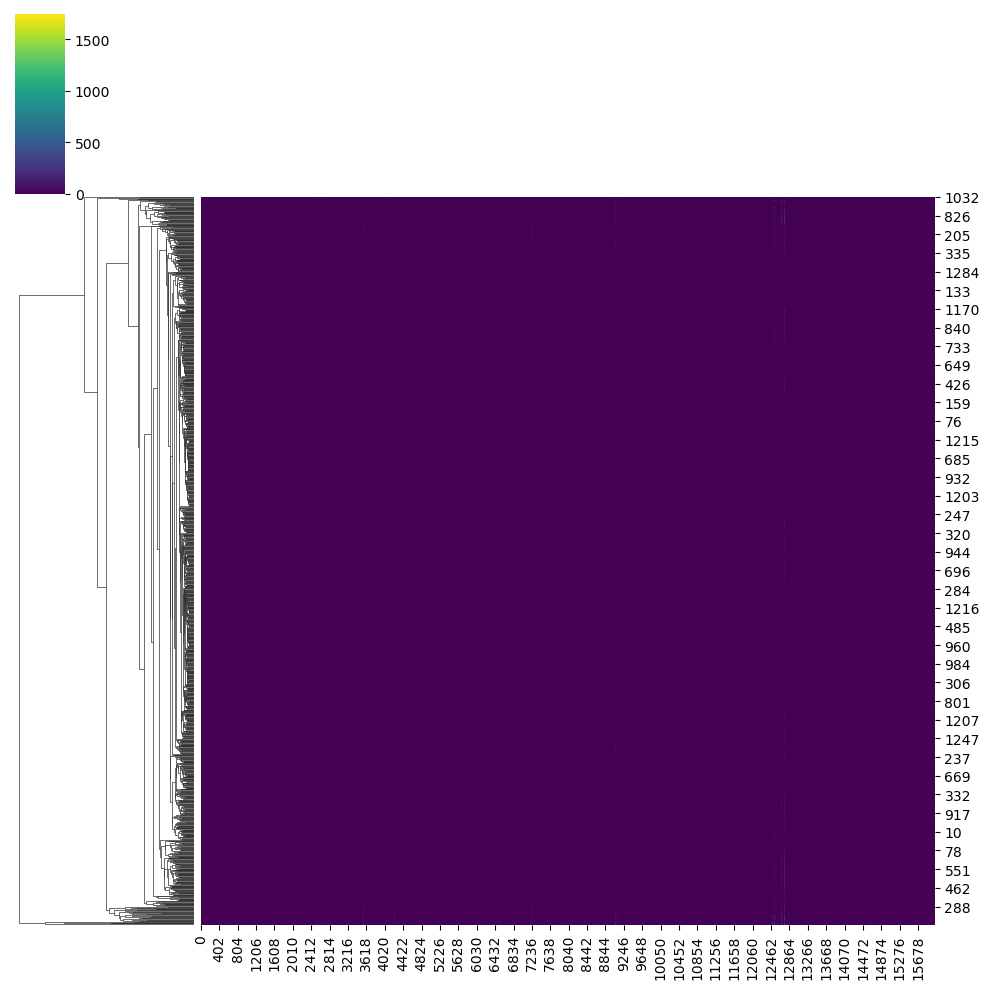

In [20]:
#perform hierarchical clustering
gene_linkage = linkage(clus3.X, method='average')

gene_clusters = fcluster(gene_linkage, t=7, criterion='maxclust')

#add cluster assignments
clus3.obs['gene_clusters'] = gene_clusters

#plot the hierarchical clustering dendrogram using seaborn
sns.clustermap(clus3.X, row_linkage=gene_linkage, col_cluster=False, cmap='viridis')

plt.show()

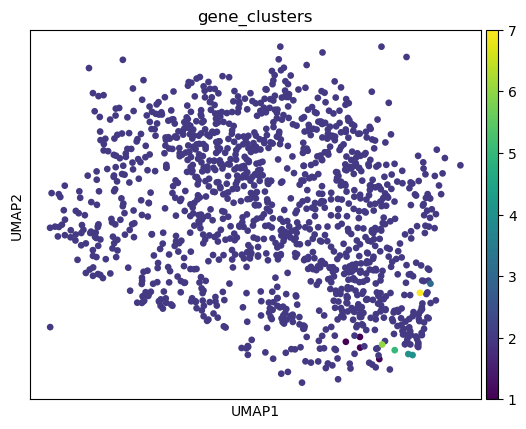

In [21]:
#Note: doesn't look like a very good clustering
#view as umap
sc.pl.umap(clus3, color = 'gene_clusters')

### Although hierarchical clustering works, the 7 'clusters' it produces are very uneven. Particularly, the hierarchical clustering method used by the authors included accessing genetic features from GENCODE and and cross-referencing with Drop-seq data, both of which were outside of the scope of this project. That being said, I wanted to see if another clustering method would produce 7 more comparable clusters within the epithelial cell cluster.

### Non-hierarchical clustering - Leiden method

In [22]:
#non hierarchical clustering method - rerun pca and neighbors on subset cluster
sc.tl.pca(clus3)
sc.pp.neighbors(clus3)
sc.tl.umap(clus3)

In [23]:
#Note: authors did not provide a resolution value for clustering, chose value that would generate 7 clusters
sc.tl.leiden(clus3,resolution=0.35) 

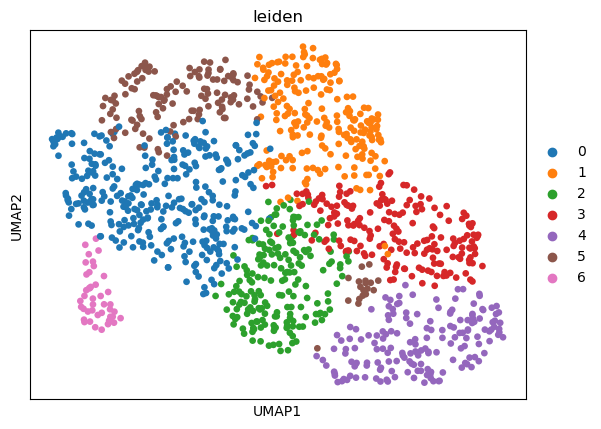

In [24]:
sc.pl.umap(clus3,color = "leiden")

### Fig 2E1 for comparison:

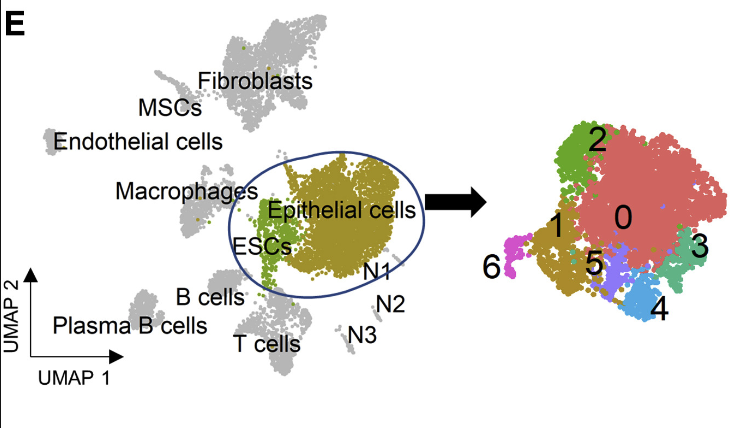

In [25]:
fig_2e1_path = 'Figure 2E1.png'
fig_2e1 = Image.open(fig_2e1_path)
display(fig_2e1)

## Claim 4: The top 10 genes per subcluster within the epithelial cell cluster can be visualized in a heatmap (Fig 2E2).

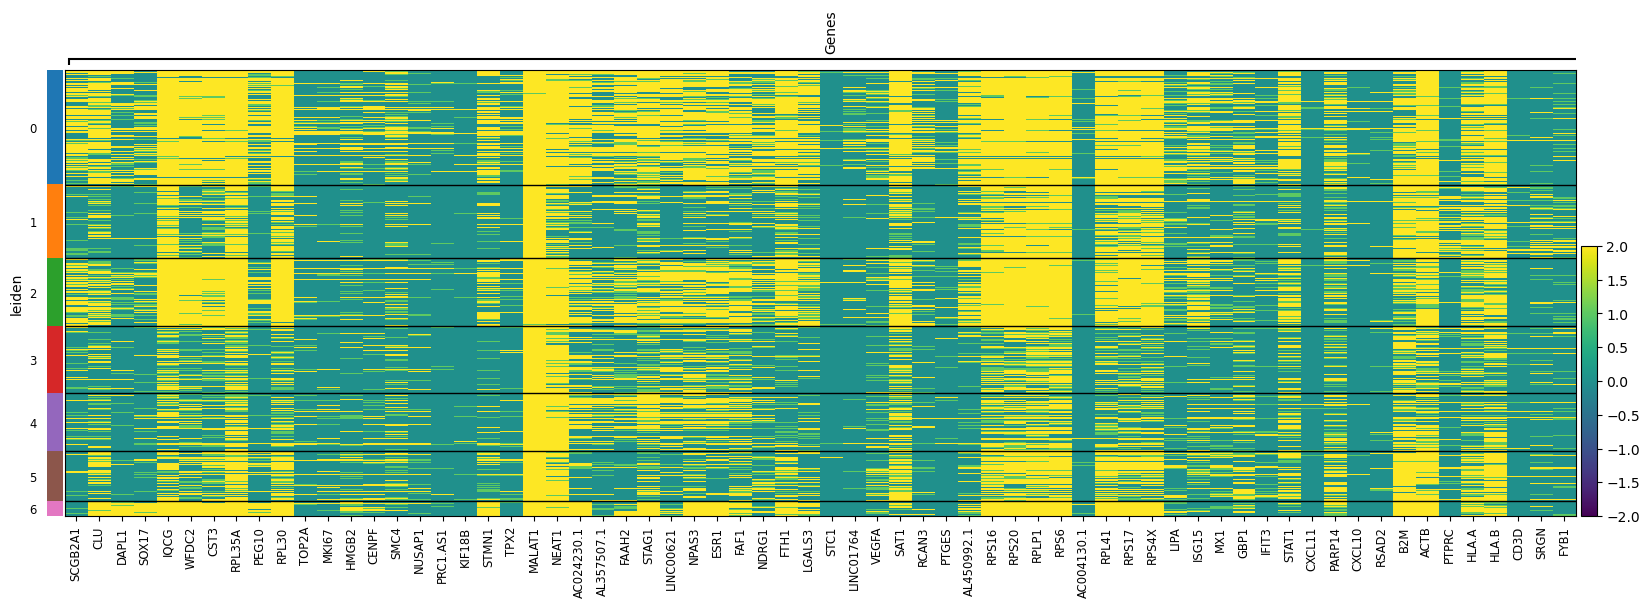

In [26]:
#create top 10 list of genes from Fig 2E - 66 genes in total for 7 clusters
top_10 = ['SCGB2A1', 'CLU',  'DAPL1',  'SOX17',  'IQCG',  'WFDC2',  'CST3',  'RPL35A',  'PEG10',  'RPL30', 
          'TOP2A',  'MKI67',  'HMGB2',  'CENPF',  'SMC4',  'NUSAP1',  'PRC1.AS1',  'KIF18B',  'STMN1',  'TPX2', 
          'MALAT1',  'NEAT1',  'AC024230.1',  'AL357507.1',  'FAAH2',  'STAG1',  'LINC00621',  'NPAS3',  'ESR1',  'FAF1', 
          'NDRG1',  'FTH1',  'LGALS3',  'STC1',  'LINC01764',  'VEGFA',  'SAT1',  'RCAN3',  'PTGES',  'AL450992.1', 
          'RPS16',  'RPS20',  'RPLP1',  'RPS6',  'AC004130.1',  'RPL41',  'RPS17',  'RPS4X',  'LIPA',  'ISG15', 
          'MX1',  'GBP1',  'IFIT3',  'STAT1',  'CXCL11',  'PARP14',  'CXCL10',  'RSAD2',  'B2M',  'ACTB', 
          'PTPRC',  'HLA.A',  'HLA.B',  'CD3D',  'SRGN',  'FYB1']

sc.pl.heatmap(clus3, var_names=top_10, groupby = "leiden", show_gene_labels = True, vmin = -2, vmax = 2, cmap = "viridis", var_group_positions=[(0, len(top_10))],var_group_labels=["Genes"],)


### Fig 2E2 for comparison:

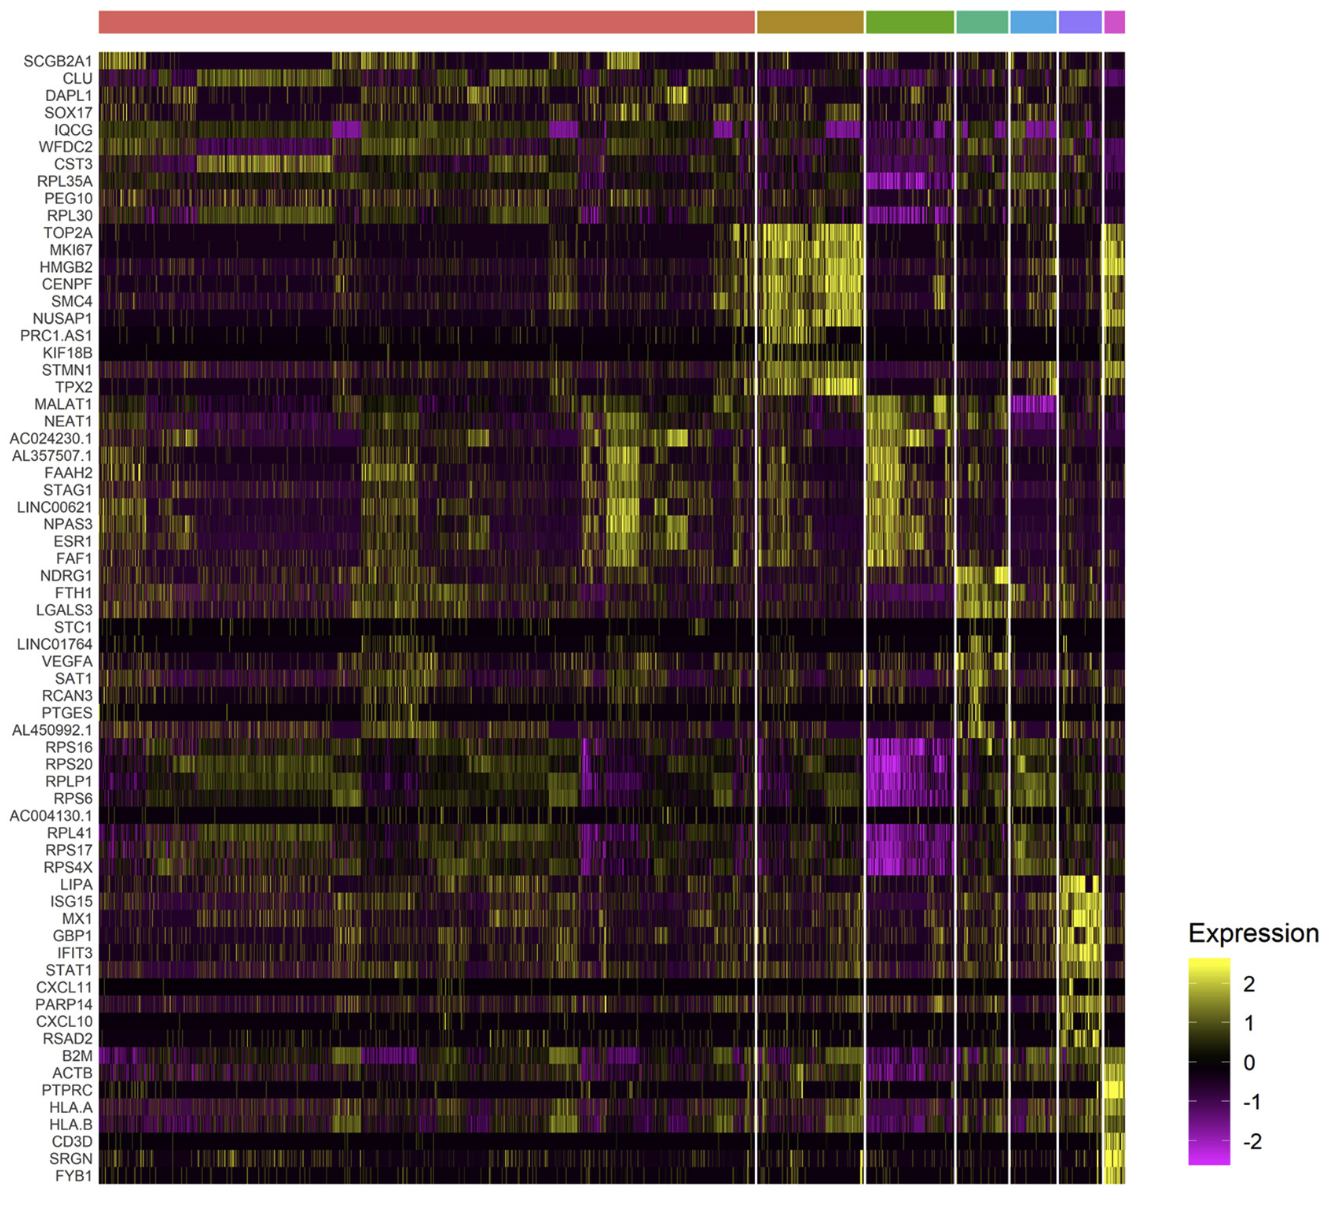

In [27]:
fig_2e2_path = 'Figure 2E2.png'
fig_2e2 = Image.open(fig_2e2_path)
display(fig_2e2)

## Claim 5: Gene ontology analysis correlates certain pathways, such as epithelial tube morphogenesis and epithelial cell differentiation, with sub-clusters found within the epithelial cell cluster (Table S2). 

In [28]:
#extract genes from epithelial cell cluster
clus3_index = clus3.var_names.tolist()

In [29]:
#perform gene ontology analysis
clus3_path = gget.enrichr(clus3_index, database="ontology")

Fri Dec 15 01:25:08 2023 INFO Performing Enichr analysis using database GO_Biological_Process_2021. 
    Please note that there might be a more appropriate database for your application. 
    Go to https://maayanlab.cloud/Enrichr/#libraries for a full list of supported databases.
    


In [30]:
#view all paths
clus3_path

rank                                          path_name         p_val  \
0        1        mRNA splicing, via spliceosome (GO:0000398)  4.456818e-17   
1        2  RNA splicing, via transesterification reaction...  4.854866e-16   
2        3                       mRNA processing (GO:0006397)  2.040651e-14   
3        4                       rRNA processing (GO:0006364)  2.153303e-14   
4        5  proteasome-mediated ubiquitin-dependent protei...  2.417775e-13   
...    ...                                                ...           ...   
6013  6014         glucuronate metabolic process (GO:0019585)  9.999982e-01   
6014  6015  fat-soluble vitamin catabolic process (GO:0042...  9.999982e-01   
6015  6016  regulation of flagellated sperm motility (GO:1...  9.999982e-01   
6016  6017  energy coupled proton transport, down electroc...  9.999984e-01   
6017  6018  complement activation, lectin pathway (GO:0001...  9.999985e-01   

        z_score  combined_score  \
0      8.327781    3.135369e+02   
1      8.720354    3.074917e+02   
2      5.115247    1.612475e+02   
3     21.318431    6.708737e+02   
4      4.215286    1.224572e+02   
...         ...             ...   
6013   0.037850    6.842670e-08   
6014   0.049242    8.728041e-08   
6015   0.049242    8.728041e-08   
6016   0.022376    3.576440e-08   
6017   0.027362    4.162324e-08   

                                      overlapping_genes     adj_p_val  \
0     [EIF4A3, GPATCH1, HNRNPU, HNRNPR, WDR83, CCAR1...  2.682113e-13   
1     [EIF4A3, GPATCH1, HNRNPU, HNRNPR, WDR83, CCAR1...  1.460829e-12   
2     [TCERG1, CCNH, EIF4A3, GPATCH1, HNRNPU, HNRNPR...  3.239645e-11   
3     [RPL4, POP5, RPL5, RPL30, RPL3, RPL32, RPL31, ...  3.239645e-11   
4     [RB1, CCNF, CDC20, PSMD8, PSMD9, PSMD6, CDC23,...  2.910034e-10   
...                                                 ...           ...   
6013                                   [ABHD10, UGT2B7]  9.999985e-01   
6014                                 [CYP26A1, CYP4F11]  9.999985e-01   
6015                                    [CFAP69, TACR1]  9.999985e-01   
6016                                           [VPS9D1]  9.999985e-01   
6017                                            [MFAP4]  9.999985e-01   

                        database  
0     GO_Biological_Process_2021  
1     GO_Biological_Process_2021  
2     GO_Biological_Process_2021  
3     GO_Biological_Process_2021  
4     GO_Biological_Process_2021  
...                          ...  
6013  GO_Biological_Process_2021  
6014  GO_Biological_Process_2021  
6015  GO_Biological_Process_2021  
6016  GO_Biological_Process_2021  
6017  GO_Biological_Process_2021  

[6018 rows x 8 columns]

In [31]:
#look for epithelial tube morphogenesis path from Table S2
clus3_path[clus3_path['path_name'].str.contains('epithelial tube morphogenesis', case=False)]

rank                                   path_name     p_val   z_score  \
3790  3791  epithelial tube morphogenesis (GO:0060562)  0.782545  0.801795   

      combined_score                                  overlapping_genes  \
3790        0.196603  [ACVRL1, CSF1R, MESP1, RYR2, PRKX, GATA3, PKD2...   

      adj_p_val                    database  
3790   0.999998  GO_Biological_Process_2021

In [32]:
#look for prostate epithelial cord elongation path from Table S2
#Note: not found, empty dataframe shown here
clus3_path[clus3_path['path_name'].str.contains('prostate epithelial cord elongation', case=False)]

Empty DataFrame
Columns: [rank, path_name, p_val, z_score, combined_score, overlapping_genes, adj_p_val, database]
Index: []

In [33]:
#look for branching morphogenesis of an epithelial tube path from Table S2
clus3_path[clus3_path['path_name'].str.contains('branching morphogenesis of an epithelial tube', case=False)]

rank                                          path_name     p_val  \
5588  5589  branching morphogenesis of an epithelial tube ...  0.998938   

       z_score  combined_score  \
5588  0.390959        0.000415   

                                      overlapping_genes  adj_p_val  \
5588  [NRP1, NOTCH4, LRP5, SIX1, SEMA3E, PKD2, FGF2,...   0.999998   

                        database  
5588  GO_Biological_Process_2021

In [34]:
#look for epithelial cell differentiation path from Table S2
epithelial_cell = clus3_path[clus3_path['path_name'].str.contains('epithelial cell differentiation', case=False)]
epithelial_cell.iloc[15:16]

rank                                     path_name     p_val   z_score  \
5683  5684  epithelial cell differentiation (GO:0030855)  0.999668  0.484197   

      combined_score                                  overlapping_genes  \
5683        0.000161  [MESP1, EHF, ACADVL, SIX1, ZDHHC7, DNPH1, LGAL...   

      adj_p_val                    database  
5683   0.999998  GO_Biological_Process_2021

In [35]:
#look for dichotomous subdivision of an epithelial terminal unit from Table S2
#Note: not found, empty dataframe shown here
clus3_path[clus3_path['path_name'].str.contains('dichotomous subdivision of an epithelial terminal unit', case=False)]

Empty DataFrame
Columns: [rank, path_name, p_val, z_score, combined_score, overlapping_genes, adj_p_val, database]
Index: []

In [36]:
#look for negative regulation of metanephric nephron tubule epithelial cell differentiation from Table S2
#Note: not found, empty dataframe shown here
#closest paths found were metanephric nephron tubule morphogenesis and metanephric nephron tubule development
clus3_path[clus3_path['path_name'].str.contains('negative regulation of metanephric nephron tubule epithelial cell differentiation', case=False)]

Empty DataFrame
Columns: [rank, path_name, p_val, z_score, combined_score, overlapping_genes, adj_p_val, database]
Index: []

In [37]:
#look for negative regulation of mammary gland epithelial cell proliferation from Table S2
#Note: not found, empty dataframe shown here
#closest path found was regulation of mammary gland epithelial cell proliferation
clus3_path[clus3_path['path_name'].str.contains('negative regulation of mammary gland epithelial cell proliferation', case=False)]

Empty DataFrame
Columns: [rank, path_name, p_val, z_score, combined_score, overlapping_genes, adj_p_val, database]
Index: []

In [38]:
#look for epithelial cell proliferation involved in liver morphogenesis from Table S2
#Note: not found, empty dataframe shown here
clus3_path[clus3_path['path_name'].str.contains('epithelial cell proliferation involved in liver morphogenesis', case=False)]

Empty DataFrame
Columns: [rank, path_name, p_val, z_score, combined_score, overlapping_genes, adj_p_val, database]
Index: []

In [39]:
#look for mammary gland epithelial cell proliferation from Table S2
#Note: 'regulation of' mammary gland epithelial cell proliferation,not exact match for mammary gland epithelial cell proliferation
clus3_path[clus3_path['path_name'].str.contains('mammary gland epithelial cell proliferation', case=False)]

rank                                          path_name     p_val  \
1135  1136  regulation of mammary gland epithelial cell pr...  0.137284   

      z_score  combined_score  \
1135  35631.0    70752.663083   

                                      overlapping_genes  adj_p_val  \
1135  [GPX1, DEAF1, MST1, ZNF703, GATA3, BRCA2, RREB...    0.72037   

                        database  
1135  GO_Biological_Process_2021

In [40]:
#look for epithelial cell proliferation from Table S2
#Note: no exact matches
general_epithelial_proliferation = clus3_path[clus3_path['path_name'].str.contains('epithelial cell proliferation', case=False)]
general_epithelial_proliferation.iloc[1:]

rank                                          path_name     p_val  \
1956  1957  negative regulation of epithelial cell prolife...  0.309717   
2472  2473  regulation of epithelial cell proliferation (G...  0.416017   
4165  4166  positive regulation of epithelial cell prolife...  0.877542   
5181  5182  positive regulation of epithelial cell prolife...  0.990069   

       z_score  combined_score  \
1956  1.234904        1.447428   
2472  1.103856        0.968113   
4165  0.798810        0.104349   
5181  0.246617        0.002461   

                                      overlapping_genes  adj_p_val  \
1956  [CDKN1C, SPARC, PTPRM, PTPRK, BRCA2, CDC73, RO...   0.879791   
2472  [ACVRL1, CDKN1C, LAMC1, FGF1, FGF2, CDC73, EPB...   0.999998   
4165  [SEMA5A, NRP1, ECM1, NRP2, BMPR2, PDCD6, FLT4,...   0.999998   
5181                         [JAML, FZD7, WNT7A, CLDN1]   0.999998   

                        database  
1956  GO_Biological_Process_2021  
2472  GO_Biological_Process_2021  
4165  GO_Biological_Process_2021  
5181  GO_Biological_Process_2021

## Table S2 for comparison:


In [41]:
#read all sheets into a dictionary of dataframes
#Note: printout of sheets are sliced to show only the first three columns for reading clarity
table_s2 = pd.read_excel('1-s2.0-S2211124721005076-mmc3.xlsx', sheet_name=None)

#access individual sheets by name
sheet1 = table_s2['go process cluster 2']
sheet2 = table_s2['go process cluster 3']
sheet3 = table_s2['go process cluster 5']
sheet4 = table_s2['go process cluster 6']

#print
print("\nGene Ontology analysis for subcluster 2 of epithelial cells:")
print(sheet1.iloc[:, :3].to_string(index=False))

print("\nGene Ontology analysis for subcluster 3 of epithelial cells:")
print(sheet2.iloc[:, :3].to_string(index=False))

print("\nGene Ontology analysis for subcluster 5 of epithelial cells:")
print(sheet3.iloc[:, :3].to_string(index=False))

print("\nGene Ontology analysis for subcluster 6 of epithelial cells:")
print(sheet4.iloc[:, :3].to_string(index=False))


Gene Ontology analysis for subcluster 2 of epithelial cells:
              Category         ID                                          Name
GO: Biological Process GO:0060562                 epithelial tube morphogenesis
GO: Biological Process GO:0060523           prostate epithelial cord elongation
GO: Biological Process GO:0048754 branching morphogenesis of an epithelial tube

Gene Ontology analysis for subcluster 3 of epithelial cells:
              Category         ID                                                   Name
GO: Biological Process GO:0030855                        epithelial cell differentiation
GO: Biological Process GO:0060600 dichotomous subdivision of an epithelial terminal unit

Gene Ontology analysis for subcluster 5 of epithelial cells:
              Category         ID                                                                               Name
GO: Biological Process GO:0072308 negative regulation of metanephric nephron  tubule epithelial cell different

## Discussion: Do you find the main claims of the paper to be substantiated? Are there any areas where you could not reproducible the results or any caveats to what was found? Try to place the findings in the context of the field: how do they move the field forward. What are next steps for this research?

### Although there remains a fair amount of analysis to be performed to get from the claims of the paper that I investigated to the main claims of the paper, I did find the main claims to be substantiated based on the evidence that I could replicate. Both the gene expression plots of epithelial cell type markers (Fig 2F) and the gene ontology pathways (Table S2) were particularly illuminating: I was not only able to confirm that the cluster I determined to be epithelial cells based on the gene markers was correct, I was also able to replicate the correlation between cluster identity and pathway of 5 out of the 10 pathways that the authors found. 
### It was difficult to assess the validity of the paper's main claims, knowing that I did not have access to the integration, annotation, and cross-referencing tools that the authors did to verify their findings. Due to the lack of these tools, the claims I replicated in this report are mainly preliminary steps in a long course of analysis. In particular, it was hard to assess the accuracy of my own clustering since it relied almost solely on gene expression with little cross-references to be found besides the gene markers for the epithelial cell cluster. Furthermore, limitations of the data format and process made it difficult to exactly replicate certain results, such as the orientation of the heatmap in Figure 2E. 
### Annotation of cell types present in tumor tissue remains crucial to understanding the roles that each cell type and subtype play in the tumor microenvironment. Cancer associated fibroblasts identified in this dataset require further study to illuminate their role in patient responses to certain therapies. The authors' designation of high and low T cell infiltration groups and the cell types which are involved in each group provide avenues for further research in indicating patient survival based on the infiltration levels of CD8+TOX+ T cells and CD4+GNLY+ T cells. It also reveals connections between plasmablast-like B cells, CD274+ macrophages, and the previously mentioned types of T cells, necessitating a mechanistic study of these cell interactions within the tumor microenvironment to make improvements to patient response to immune checkpoint inhibitors.



## References:
### Siegel, R.L., Miller, K.D. and Jemal, A. (2017), Cancer statistics, 2017. CA: A Cancer Journal for Clinicians, 67: 7-30. https://doi.org/10.3322/caac.21387
### Testa U, Castelli G, Pelosi E. Genetic Abnormalities, Clonal Evolution, and Cancer Stem Cells of Brain Tumors. Medical Sciences. 2018; 6(4):85. https://doi.org/10.3390/medsci6040085